In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train = pd.read_excel('train.xlsx')
display(train.head())
print(train.info())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
1,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
2,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
3,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
4,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The *Cabin* column is only 23% filled, so I will not be using this column for data analysis.
Note that *Age* column is also missing data with only 80% filled, but we will still use this column

In [25]:
#remove Cabin column
train_clean = train.drop(columns = ['Cabin'])
display(train_clean)
print(train_clean.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,S
1,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S
2,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S
3,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,S
4,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S
887,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,S
888,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,S
889,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [66]:
# just curious to see if Passenger Class ticket has any correlation to the documentation of age
no_age = train_clean[train_clean['Age'].isna()]
print(f'Percentage of first class no age: {(no_age["Pclass"][no_age["Pclass"] == 1].count() / no_age.shape[0]).round(2)}%')
print(f'Percentage of second class no age: {(no_age["Pclass"][no_age["Pclass"] == 2].count() / no_age.shape[0]).round(2)}%')
print(f'Percentage of thrid class no age: {(no_age["Pclass"][no_age["Pclass"] == 3].count() / no_age.shape[0]).round(2)}% \n')

has_age = train_clean[train_clean['Age'].notna()]
print(f'Percentage of first class has age: {(has_age["Pclass"][has_age["Pclass"] == 1].count() / has_age.shape[0]).round(2)}%')
print(f'Percentage of second class has age: {(has_age["Pclass"][has_age["Pclass"] == 2].count() / has_age.shape[0]).round(2)}%')
print(f'Percentage of third class has age: {(has_age["Pclass"][has_age["Pclass"] == 3].count() / has_age.shape[0]).round(2)}%')

Percentage of first class no age: 0.17%
Percentage of second class no age: 0.06%
Percentage of thrid class no age: 0.77% 

Percentage of first class has age: 0.26%
Percentage of second class has age: 0.24%
Percentage of third class has age: 0.5%


Upon a quick glance, we see that passengers that do not have their age documented belonged to lower class seats. This may be a reflection of how society may have treated the importance of personal information depending on their hierchachy

In [92]:
# separate data into two dataframes: passengers that survived and passengers that died
# survived = train_clean[train_clean['Survived'] == 1]
# died = train_clean[train_clean['Survived'] == 0]

# print(survived.info())
# print(died.info())


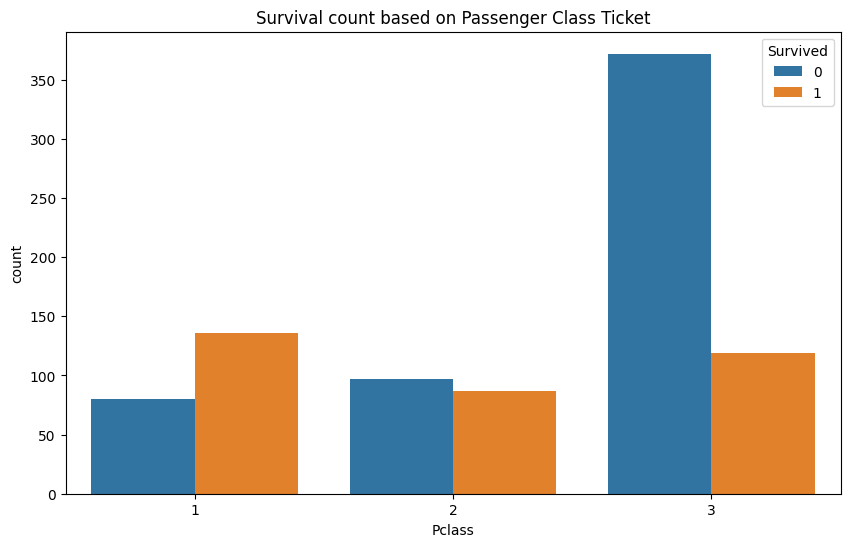

In [91]:
# lets take a look at the correlation between passenger class with survivability
plt.figure(figsize=(10, 6))
sns.countplot(data = train_clean, x='Pclass', hue='Survived')
plt.title('Survival count based on Passenger Class Ticket')
plt.show()

Looks like passengers that bought third class ticket are more likely to die, and first class passengers are slightly likely to survive

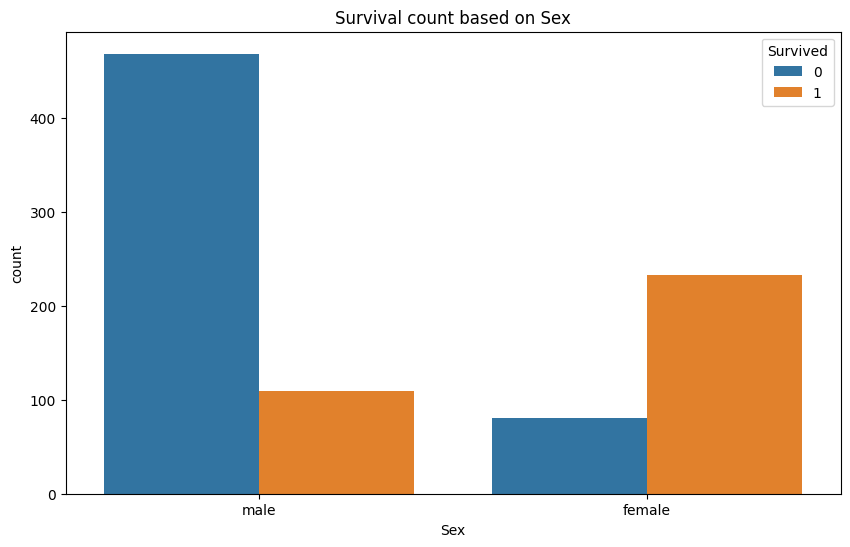

In [93]:
# lets see how age correlates to survivability
plt.figure(figsize=(10, 6))
sns.countplot(data=train_clean, x='Sex', hue='Survived')
plt.title('Survival count based on Sex')
plt.show()

Based on the data males are more likely to die and females are more likely to die

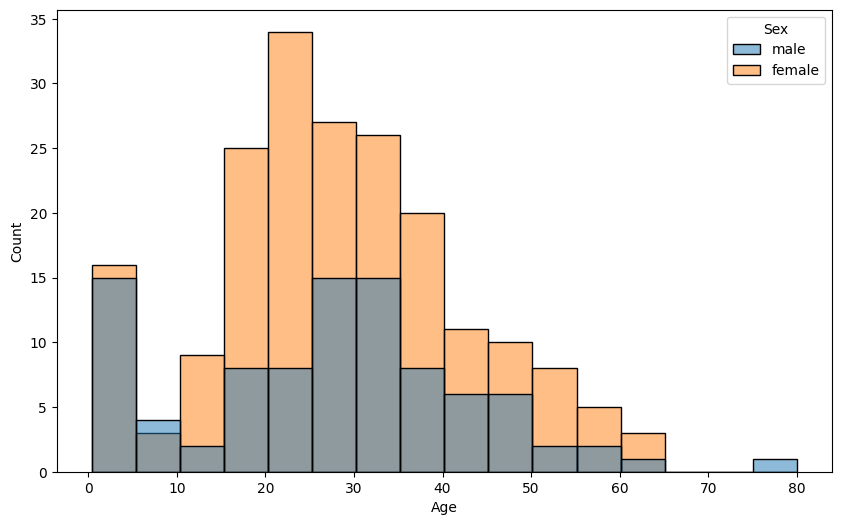

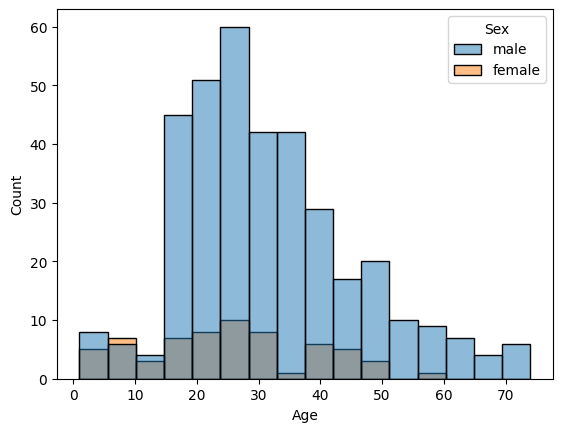

In [97]:
# Lets take a look at how Age plays a role in survivability
plt.figure(figsize=(10,6))
sns.histplot(data = survived, x='Age', hue='Sex')
plt.show()
sns.histplot(data = died, x='Age', hue='Sex')
plt.show()

